# Projeto

In [126]:
import os

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import OrdinalEncoder

In [23]:
os.listdir('../../machine_learning_i/projeto/dados')

['application_test_student.csv',
 'metadados.pdf',
 'HomeCredit_columns_description.csv',
 'POS_CASH_balance.csv',
 'credit_card_balance.csv',
 'installments_payments.csv',
 'application_train.csv',
 'bureau.csv',
 'previous_application.csv',
 'bureau_balance.csv',
 'sample_submission.csv']

In [156]:
caminho = '../../machine_learning_i/projeto/dados'
arquivo = 'application_train.csv'
arquivo_oculto = 'application_test_student.csv'
arquivo_metadados = 'HomeCredit_columns_description.csv'

In [22]:
# uma forma de concatenar caminhos e arquivos arquivos

arquivo = '/application_train.csv'
caminho + arquivo

'../../machine_learning_i/projeto/dados/application_train.csv'

In [157]:
df_metadados = pd.read_csv(f'{caminho}/{arquivo_metadados}')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 1283: invalid start byte

In [159]:
pip install chardet

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
     |████████████████████████████████| 193 kB 706 kB/s eta 0:00:01
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [160]:
import chardet    
rawdata = open(f'{caminho}/{arquivo_metadados}', 'rb').read()
result = chardet.detect(rawdata)
charenc = result['encoding']
print(charenc)

Windows-1252


In [163]:
df_metadados = pd.read_csv(f'{caminho}/{arquivo_metadados}', 
                           encoding = 'Windows-1252')

In [167]:
df_metadados['Row']

0                 SK_ID_CURR
1                     TARGET
2         NAME_CONTRACT_TYPE
3                CODE_GENDER
4               FLAG_OWN_CAR
               ...          
214    NUM_INSTALMENT_NUMBER
215          DAYS_INSTALMENT
216       DAYS_ENTRY_PAYMENT
217           AMT_INSTALMENT
218              AMT_PAYMENT
Name: Row, Length: 219, dtype: object

In [168]:
df_metadados['Row'] == 'DAYS_EMPLOYED'

0      False
1      False
2      False
3      False
4      False
       ...  
214    False
215    False
216    False
217    False
218    False
Name: Row, Length: 219, dtype: bool

In [169]:
df_metadados[df_metadados['Row'] == 'DAYS_EMPLOYED']

,Unnamed: 0,Table,Row,Description,Special
18,21,application_{train|test}.csv,DAYS_EMPLOYED,How many days before the application the perso...,time only relative to the application


In [171]:
df_metadados[df_metadados['Row'] == 'DAYS_EMPLOYED']['Description'].iloc[0]

'How many days before the application the person started current employment'

## Lendo os arquivos de input

In [113]:
df = pd.read_csv(f'{caminho}/{arquivo}')

df_oculto = pd.read_csv(f'{caminho}/{arquivo_oculto}')

In [27]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,456162,0,Cash loans,F,N,N,0,112500.0,700830.0,22738.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,134978,0,Cash loans,F,N,N,0,90000.0,375322.5,14422.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0
2,318952,0,Cash loans,M,Y,N,0,180000.0,544491.0,16047.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,3.0
3,361264,0,Cash loans,F,N,Y,0,270000.0,814041.0,28971.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
4,260639,0,Cash loans,F,N,Y,0,144000.0,675000.0,21906.0,...,0,0,0,0,0.0,0.0,0.0,10.0,0.0,0.0


In [30]:
df.isna().sum().head(50)

SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                        10
AMT_GOODS_PRICE                   226
NAME_TYPE_SUITE                  1048
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                    162359
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE  

### Definindo variável explicativa, resposta, treino e teste

In [39]:
var_expl = [
    'CNT_CHILDREN', 
    'AMT_INCOME_TOTAL', 
    'DAYS_BIRTH', 
    'DAYS_EMPLOYED',
    'FLAG_MOBIL'
]

var_resp = 'TARGET'

In [152]:
df_treino[var_expl].describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL
count,209106.000000,2.091060e+05,209106.000000,209106.000000,209106.0
mean,0.416315,1.687947e+05,-16038.791512,63831.300517,1.0
std,0.721685,2.766687e+05,4363.440343,141291.063158,0.0
min,0.000000,2.565000e+04,-25229.000000,-17912.000000,1.0
25%,0.000000,1.125000e+05,-19686.000000,-2756.000000,1.0
50%,0.000000,1.440000e+05,-15760.000000,-1217.000000,1.0
75%,1.000000,2.025000e+05,-12420.000000,-289.000000,1.0
max,19.000000,1.170000e+08,-7489.000000,365243.000000,1.0


In [155]:
(df_treino['DAYS_EMPLOYED'] > 0).value_counts(normalize = True)

False    0.819881
True     0.180119
Name: DAYS_EMPLOYED, dtype: float64

In [41]:
df_treino, df_teste = train_test_split(df, test_size = 0.15)

In [42]:
x_treino = df_treino[var_expl].copy()
y_treino = df_treino[var_resp].copy()

x_teste = df_teste[var_expl].copy()
y_teste = df_teste[var_resp].copy()

### Primeiro modelo - Árvore de Decisão

In [99]:
modelo = DecisionTreeClassifier(
    max_leaf_nodes = 50, 
    random_state = 1
)

modelo.fit(x_treino, y_treino)

y_pred_treino = modelo.predict_proba(x_treino)[:, 1]
y_pred_teste = modelo.predict_proba(x_teste)[:, 1]

In [100]:
roc_auc_score(y_treino, y_pred_treino)

0.6100780673295619

In [101]:
roc_auc_score(y_teste, y_pred_teste)

0.6116587999289765

In [102]:
var_expl

['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'FLAG_MOBIL']

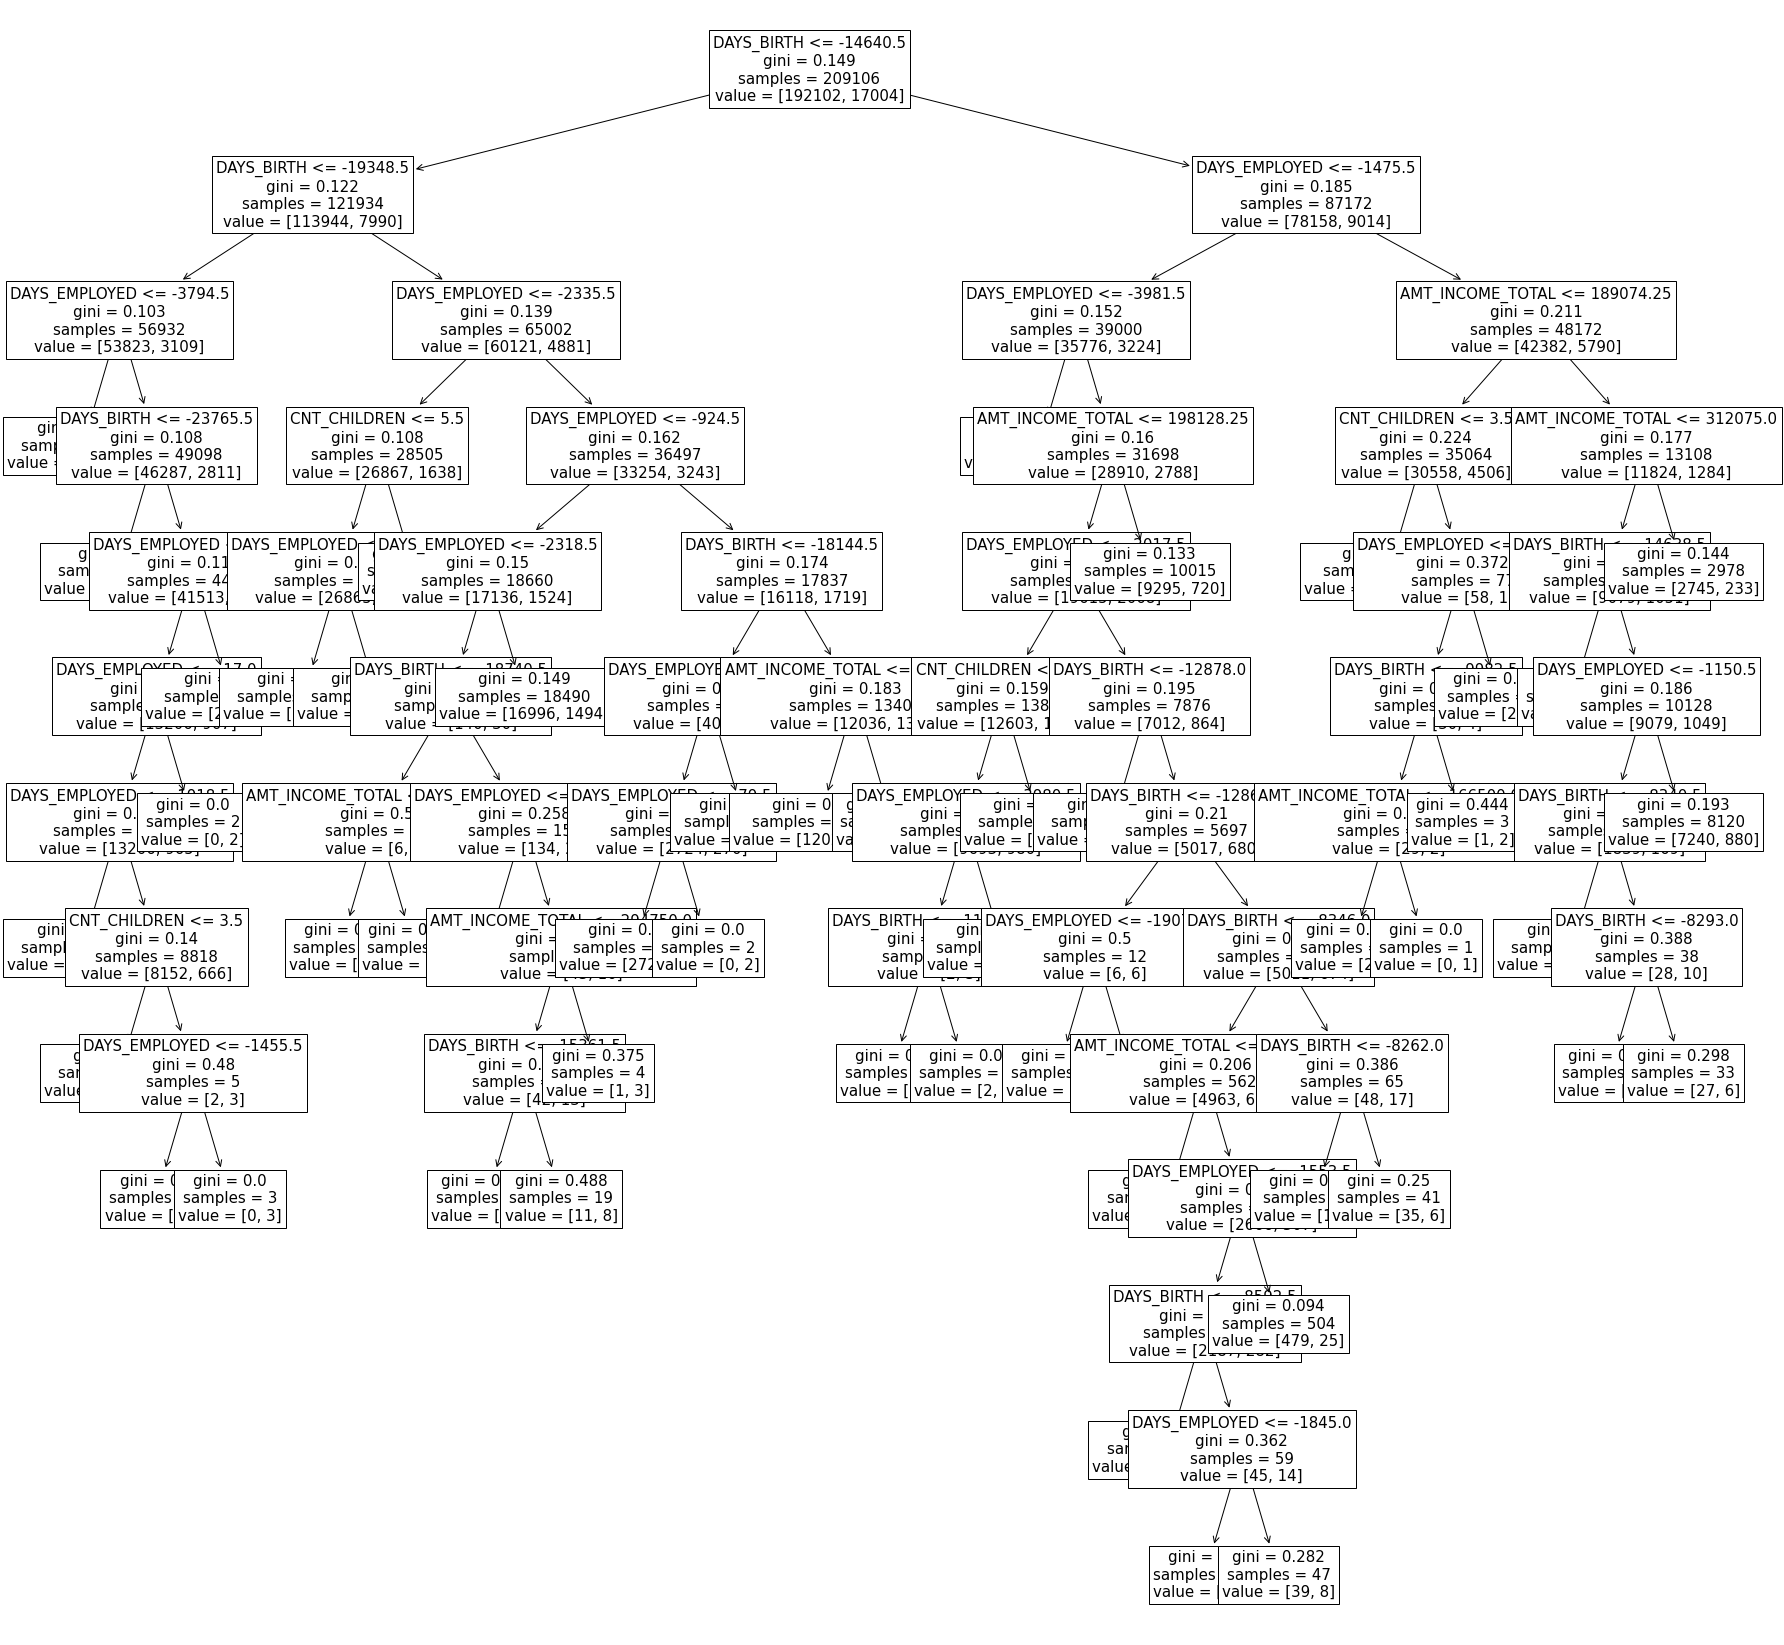

In [103]:
plt.figure(figsize = (30, 30))

plot_tree(
    modelo,
    feature_names = var_expl,
    fontsize = 15
);

In [104]:
for i in zip(var_expl, modelo.feature_importances_):
    print(i)

('CNT_CHILDREN', 0.023692074054745865)
('AMT_INCOME_TOTAL', 0.0923116972001886)
('DAYS_BIRTH', 0.5106315087810845)
('DAYS_EMPLOYED', 0.3733647199639809)
('FLAG_MOBIL', 0.0)


In [111]:
importancia_features = pd.Series({i:j for i, j in zip(var_expl, modelo.feature_importances_)})
importancia_features.sort_values(ascending = False)

DAYS_BIRTH          0.510632
DAYS_EMPLOYED       0.373365
AMT_INCOME_TOTAL    0.092312
CNT_CHILDREN        0.023692
FLAG_MOBIL          0.000000
dtype: float64

In [105]:
sum(modelo.feature_importances_)

0.9999999999999999

### Previsão em cima de quem eu não tenho resposta

In [116]:
df_oculto.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,149741,Cash loans,F,N,N,0,117000.0,417024.0,20191.5,360000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
1,363290,Cash loans,M,N,Y,0,450000.0,640080.0,31261.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
2,436006,Revolving loans,M,Y,Y,0,450000.0,900000.0,45000.0,900000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,0.0
3,377703,Cash loans,M,Y,N,1,360000.0,1125000.0,33025.5,1125000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,188624,Cash loans,M,Y,Y,0,675000.0,835380.0,42840.0,675000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [118]:
df_oculto[var_expl].isna().sum()

CNT_CHILDREN        0
AMT_INCOME_TOTAL    0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
dtype: int64

In [119]:
y_pred_oculto = modelo.predict_proba(df_oculto[var_expl])[:, 1]

In [120]:
y_pred_oculto

array([0.05585653, 0.08080043, 0.06441847, ..., 0.05555185, 0.18181818,
       0.05970967])

In [122]:
df_oculto['Y_PRED'] = y_pred_oculto

In [124]:
df_oculto[['SK_ID_CURR', 'Y_PRED']]

,SK_ID_CURR,Y_PRED
0,149741,0.055857
1,363290,0.080800
2,436006,0.064418
3,377703,0.071892
4,188624,0.071892
...,...,...
61498,102817,0.064418
61499,343961,0.055552
61500,427828,0.055552
61501,405956,0.181818


### Segundo modelo - KNN

In [173]:
from sklearn.preprocessing import StandardScaler

In [179]:
transformador = StandardScaler()

transformador.fit(x_treino, y_treino)
x_treino[var_expl] = transformador.transform(x_treino)

In [184]:
x_teste[var_expl] = transformador.transform(x_teste)

In [185]:
x_treino.std()

CNT_CHILDREN        1.000002
AMT_INCOME_TOTAL    1.000002
DAYS_BIRTH          1.000002
DAYS_EMPLOYED       1.000002
FLAG_MOBIL          0.000000
dtype: float64

In [197]:
x_treino.drop('FLAG_MOBIL', axis = 1, inplace = True)
x_teste.drop('FLAG_MOBIL', axis = 1, inplace = True)

In [202]:
%time
modelo = KNeighborsClassifier(
    n_neighbors = 500
)

modelo.fit(x_treino, y_treino)

y_pred_treino = modelo.predict_proba(x_treino)[:, 1]
y_pred_teste = modelo.predict_proba(x_teste)[:, 1]

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.87 µs


In [203]:
roc_auc_score(y_treino, y_pred_treino)

0.6056321301508741

In [204]:
roc_auc_score(y_teste, y_pred_teste)

0.5889560061571614

In [ ]:
0.6142816783437068
0.6020936478581873

## Investigando NAME_EDUCATION_TYPE

In [213]:
var_expl = [
    'CNT_CHILDREN',
    'AMT_INCOME_TOTAL',
    'DAYS_BIRTH',
    'DAYS_EMPLOYED',
    'NAME_EDUCATION_TYPE'
]

In [214]:
x_treino = df_treino[var_expl].copy()
y_treino = df_treino[var_resp].copy()

x_teste = df_teste[var_expl].copy()
y_teste = df_teste[var_resp].copy()

In [216]:
x_treino['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    148685
Higher education                  50771
Incomplete higher                  6978
Lower secondary                    2558
Academic degree                     114
Name: NAME_EDUCATION_TYPE, dtype: int64

In [229]:
lista_ordenada = [
    'Lower secondary',
    'Secondary / secondary special', 
    'Incomplete higher',
    'Higher education', 
    'Academic degree', 
]

oe = OrdinalEncoder(categories = [lista_ordenada])

oe.fit(x_treino[['NAME_EDUCATION_TYPE']])
x_treino[['NAME_EDUCATION_TYPE']] = oe.transform(x_treino[['NAME_EDUCATION_TYPE']])
x_teste[['NAME_EDUCATION_TYPE']] = oe.transform(x_teste[['NAME_EDUCATION_TYPE']])

In [230]:
oe.categories_

[array(['Lower secondary', 'Secondary / secondary special',
        'Incomplete higher', 'Higher education', 'Academic degree'],
       dtype=object)]

In [242]:
modelo = DecisionTreeClassifier(
    max_leaf_nodes = 50, 
    random_state = 1
)

modelo.fit(x_treino, y_treino)

y_pred_treino = modelo.predict_proba(x_treino)[:, 1]
y_pred_teste = modelo.predict_proba(x_teste)[:, 1]

In [243]:
roc_auc_score(y_treino, y_pred_treino)

0.628150742970461

In [244]:
roc_auc_score(y_teste, y_pred_teste)

0.6275946265756525

In [235]:
importancia_features = pd.Series({i:j for i, j in zip(var_expl, modelo.feature_importances_)})
importancia_features.sort_values(ascending = False)

DAYS_BIRTH             0.389570
NAME_EDUCATION_TYPE    0.299032
DAYS_EMPLOYED          0.266104
AMT_INCOME_TOTAL       0.026944
CNT_CHILDREN           0.018350
dtype: float64

In [245]:
x_treino.shape

(209106, 5)

# Na aula anterior...

Qual a principal diferença entre Boosting e Random Forest? 

Boosting pode ser aplicado apenas em modelos de árvore. Essa frase é verdadeira?

Por que existe uma tendência ao overfiting ao utilizar Boosting?

# Hoje!

- Utilizando o AdaBoost no projeto

- Utilizando o LightGBM no projeto